# Fake News Classifier

In [2]:
import numpy as np
import pandas as pd
import matplotlib as pyplot
import seaborn as sns
%matplotlib inline

In [3]:
news = pd.read_csv('news.csv')
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
news.columns = ["length","title","text","label"]

In [5]:
news.head()

,length,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
print(news[news["title"] == "You Can Smell Hillary’s Fear"]["text"].iloc[0]) #FAKE NEWS

Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. 
In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. 
The word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. 
But that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. 
The FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. 
The FBI’s leadership is being warned that the entire left

In [7]:
print(news[news["title"] == "Kerry to go to Paris in gesture of sympathy"]["text"].iloc[0]) #REAL NEWS

U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism.

Kerry said he expects to arrive in Paris Thursday evening, as he heads home after a week abroad. He said he will fly to France at the conclusion of a series of meetings scheduled for Thursday in Sofia, Bulgaria. He plans to meet the next day with Foreign Minister Laurent Fabius and President Francois Hollande, then return to Washington.

The visit by Kerry, who has family and childhood ties to the country and speaks fluent French, could address some of the criticism that the United States snubbed France in its darkest hour in many years.

The French press on Monday was filled with questions about why neither President Obama nor Kerry attended Sunday’s march, as about 40 leaders of other nations did. Obama was said to have stayed away because his own security needs can be taxing on a country, and Ker

array([<Axes: title={'center': 'FAKE'}>, <Axes: title={'center': 'REAL'}>],
      dtype=object)

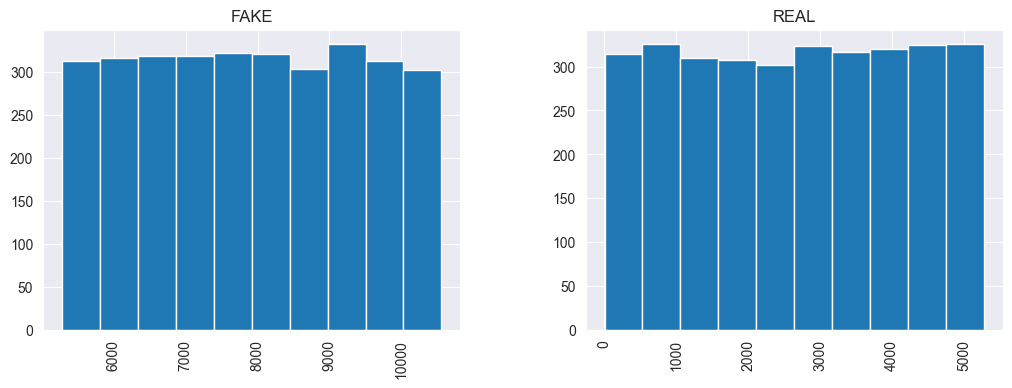

In [8]:
sns.set_style("darkgrid")
news.hist(column='length',by='label',bins=10,figsize=(12,4))

In [9]:
news["title_with_text"] = news.apply(lambda row: row['title'] + ' ' + row['text'], axis=1)
news.head()

,length,title,text,label,title_with_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...


## Data Preprocessing<br>
Our main issue with our data is that it is all in text format (strings). Most classification algorithms will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach, where each unique word in a text will be represented by one number.

## Vectorization <br>
We need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:<br>
Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(news)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

NameError: name 'y' is not defined

In [28]:
X_train

<4434x67926 sparse matrix of type '<class 'numpy.int64'>'
	with 1525686 stored elements in Compressed Sparse Row format>

## Using Naive Bayes Model

In [14]:
from sklearn.naive_bayes import MultinomialNB

In [15]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [16]:
pred = nb.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

        FAKE       0.86      0.92      0.89       885
        REAL       0.92      0.87      0.89      1016

    accuracy                           0.89      1901
   macro avg       0.89      0.89      0.89      1901
weighted avg       0.89      0.89      0.89      1901



In [18]:
print(confusion_matrix(pred, y_test))

[[810  75]
 [133 883]]


## Using Term Frequency-Inverse Term Frequency Transformer

Term Frequency = (No of occurences of word in sentence)/(Total no of words)<br>
Inverse Term Frequency = (No of occurences of word one or more times in all documents)/(Total no of documents)

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [29]:
X_untransformed = news["title_with_text"]

In [30]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_untransformed, y, test_size=0.3, random_state=101)

## Using a pipeline
sklearn supports using of a pipeline when multiple stages are involved in the creation of the model. Since we are using the TfIdf trasnformer, our pipeline needs to have 3 stages.
<ol>
    <li>Bag of Words : CountVectorizer()</li>
    <li>Term-Frequency Inverse Term-Frequency : TfidfTransformer()</li>
    <li>Naive Bayes Algorithm : MultinomialNB()</li>
</ol>

In [31]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('NaiveBayes', MultinomialNB())
])

In [32]:
pipeline.fit(Xtrain,ytrain)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('NaiveBayes', MultinomialNB())])

In [33]:
predictions = pipeline.predict(Xtest)

In [35]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

        FAKE       0.98      0.65      0.78       943
        REAL       0.74      0.99      0.85       958

    accuracy                           0.82      1901
   macro avg       0.86      0.82      0.81      1901
weighted avg       0.86      0.82      0.81      1901



In [36]:
print(confusion_matrix(ytest, predictions))

[[610 333]
 [ 10 948]]


## Is the Bag-of-Words transformed model better?

As you can see, the average precision of the first model is better than the second. However, the second model has better precision for the FAKE label. Our model should have lesser false negatives logically, since we are attempting to determine the FAKE news from the REAL news.

## Exporting the model

In [37]:
import joblib

joblib.dump(pipeline, "naive_bayes_fake_news_classification.pkl")

['fake_news_classification.pkl']

In [38]:
ls

 fake_news_classification.pkl   news.csv
'Fake News Classifier.ipynb'    news.zip
